In [ ]:
!pip install dwave-ocean-sdk 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from itertools import product, combinations
from dwave.system import DWaveSampler, EmbeddingComposite

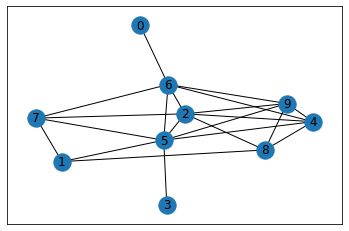

In [5]:
n = 10
G = nx.fast_gnp_random_graph(n, 0.5)
nx.draw_networkx(G)
plt.show()

In [6]:
QUBO = {}
nodes = list(G.nodes())
for i in range(n):
    QUBO[(i, i)] = -1
for (u, v) in G.edges():
    QUBO[(nodes.index(u), nodes.index(v))] = QUBO[(nodes.index(v), nodes.index(u))] = 2

In [7]:
sampler_config = {'solver': 'DW_2000Q_6', 'token': 'YOUR_TOKEN'}
sampler = EmbeddingComposite(DWaveSampler(**sampler_config))

In [8]:
sampleset = sampler.sample_qubo(QUBO)

In [11]:
print(sampleset.record.sample[0])

[1 1 0 1 0 0 0 0 0 1]


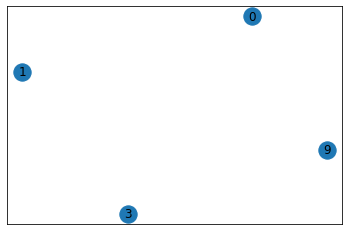

In [13]:
independent_set = set([nodes[i] for i in range(n) if sampleset.record.sample[0][i]==1])
G1 = G.subgraph(independent_set)
nx.draw_networkx(G1)
plt.show()